In [11]:
from modelData import ModelData
from boltz.boltzmannEq import boltz
from scipy.integrate import solve_ivp,odeint
import numpy as np
from matplotlib import pyplot as plt

### Load input data

In [6]:
sigmaVfile = './taacs.csv'
paramCard = './param_card.dat'
model = ModelData(dmPDG = 57, bsmPDGList= [57,1000005], paramCard=paramCard,sigmaVfile=sigmaVfile)
print(model)

Model : SM + xd(DM) + b1


### Solve equations

In [7]:
# Initial conditions
x0, xf = 0.1, 30.
n = 1000
atol = 1e-12
rtol = 1e-12
method = 'BDF'
y0 = [comp.Yeq(x0) for comp in model.componentsDict.values()]
xvals = np.linspace(x0,xf,1000)
#solving the Boltzmann equation
# sol1= solve_ivp(boltz, [x0,xf], y0, args=(model,), atol = atol, rtol = rtol, method=method)
sol1= odeint(boltz, y0, xvals, args=(model,), tfirst=True)

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1000000000000D+01   r2 =  0.4402202991582D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1000000000000D+01   r2 =  0.4402202991582D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1000000000000D+01   r2 =  0.2201101495791D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1000000000000D+01   r2 =  0.2201101495791D-16
 lsoda--  warning..internal t (=r1) 

/tmp/ipykernel_18715/178635984.py:11: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sol1= odeint(boltz, y0, xvals, args=(model,), tfirst=True)


In [10]:
Ysm = sol1[:,0]
Ydm = sol1[:,1]
Ymed = sol1[:,2]

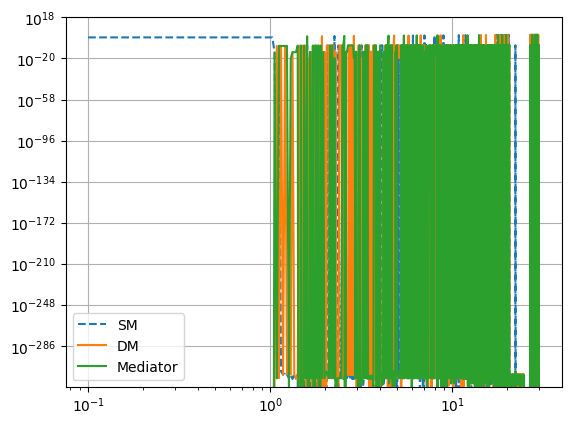

In [13]:
plt.plot(xvals,Ysm,label='SM',linestyle='dashed')
plt.plot(xvals,Ydm,label='DM')
plt.plot(xvals,Ymed,label='Mediator')

plt.legend()
plt.yscale('log')
plt.xscale('log')
# plt.ylim(1e-10,1e-1)
# plt.ylim(1e-4,10)
plt.grid()
# plt.title(r'$Y_{f} = $%1.3e (from dYdx), %1.3e (from dGdx)' %(Y_sol0[-1][0],Y_sol[-1][0]))
plt.show()